In [1]:
options(repr.plot.width=10, repr.plot.height=6)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
contracts <- read.csv('../data/processed/contract-price.csv', stringsAsFactors=FALSE) %>% 
    mutate(Date = as.Date(Date))
tail(contracts)

,Date,MarchOpen,MarchHigh,MarchLow,MarchClose,MayOpen,MayHigh,MayLow,MayClose,JulyOpen,JulyHigh,JulyLow,JulyClose
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
699,2019-08-23,895.50,898.75,883.50,885.25,907.25,910.00,895.50,897.25,917.50,920.25,906.50,908.25
700,2019-08-26,883.50,897.75,883.50,893.50,895.75,909.00,895.75,904.25,908.25,919.75,907.50,914.75
701,2019-08-27,891.50,892.00,883.25,886.25,903.00,903.00,894.75,897.25,913.00,913.50,906.00,908.00
702,2019-08-28,886.25,894.00,879.50,892.00,897.25,904.75,890.75,902.75,908.50,915.00,901.25,913.00
703,2019-08-29,891.50,897.50,891.50,894.00,902.75,907.75,902.50,904.75,913.00,918.00,912.75,914.75
704,2019-08-30,893.50,903.25,892.25,894.25,904.00,913.25,903.00,904.50,914.75,923.25,913.00,914.25


In [4]:
usSoyBeanIndices <- read.csv('../data/raw/US Soybeans Futures Historical Data.csv', stringsAsFactors=FALSE) %>% 
    mutate(Date = as.Date(Date, '%b %d, %Y'))
head(usSoyBeanIndices)

Date,Price,Open,High,Low,Vol.,Change..
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-08-30,868.25,868.38,877.62,867.12,-,0.00%
2019-08-29,868.25,865.62,872.88,865.12,-,0.35%
2019-08-28,865.25,859.38,867.62,852.62,-,0.73%
2019-08-27,859.00,865.62,865.88,856.12,-,-0.75%
2019-08-26,865.50,855.88,870.38,855.88,-,1.21%
2019-08-23,855.12,868.38,872.00,855.12,-,-1.51%


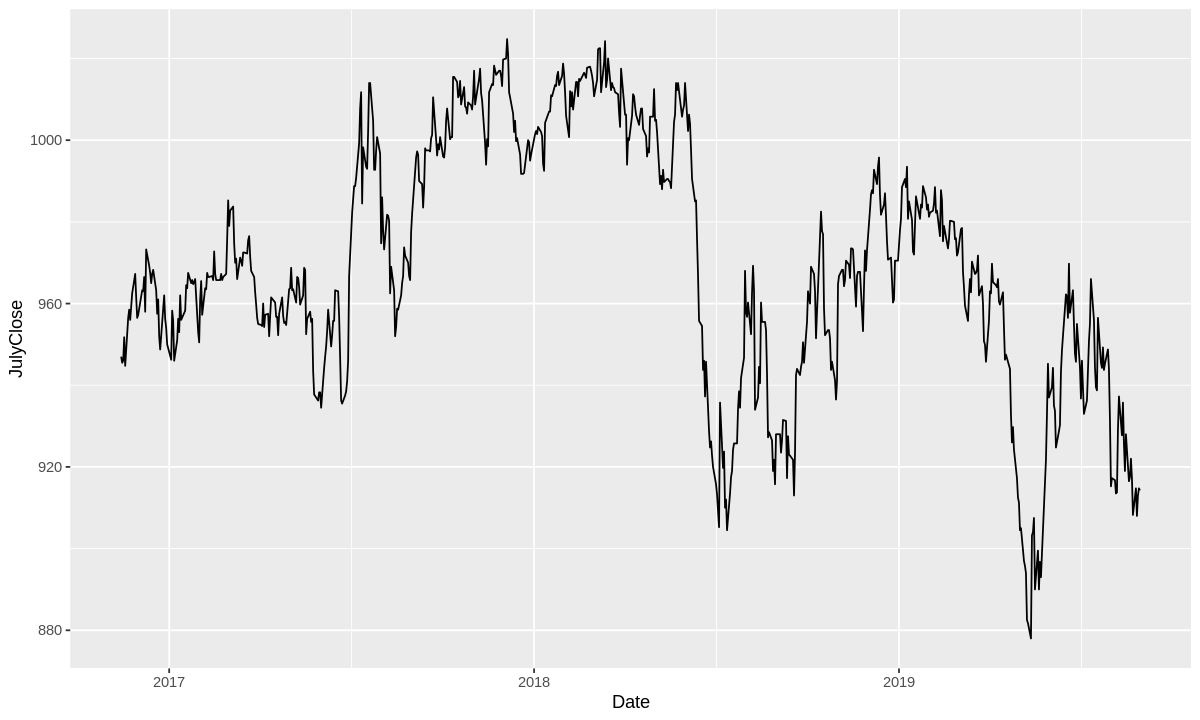

In [5]:
ggplot(contracts) +
    geom_line(aes(x=Date, y=JulyClose))

Warning message:
“Removed 252 rows containing missing values (geom_path).”

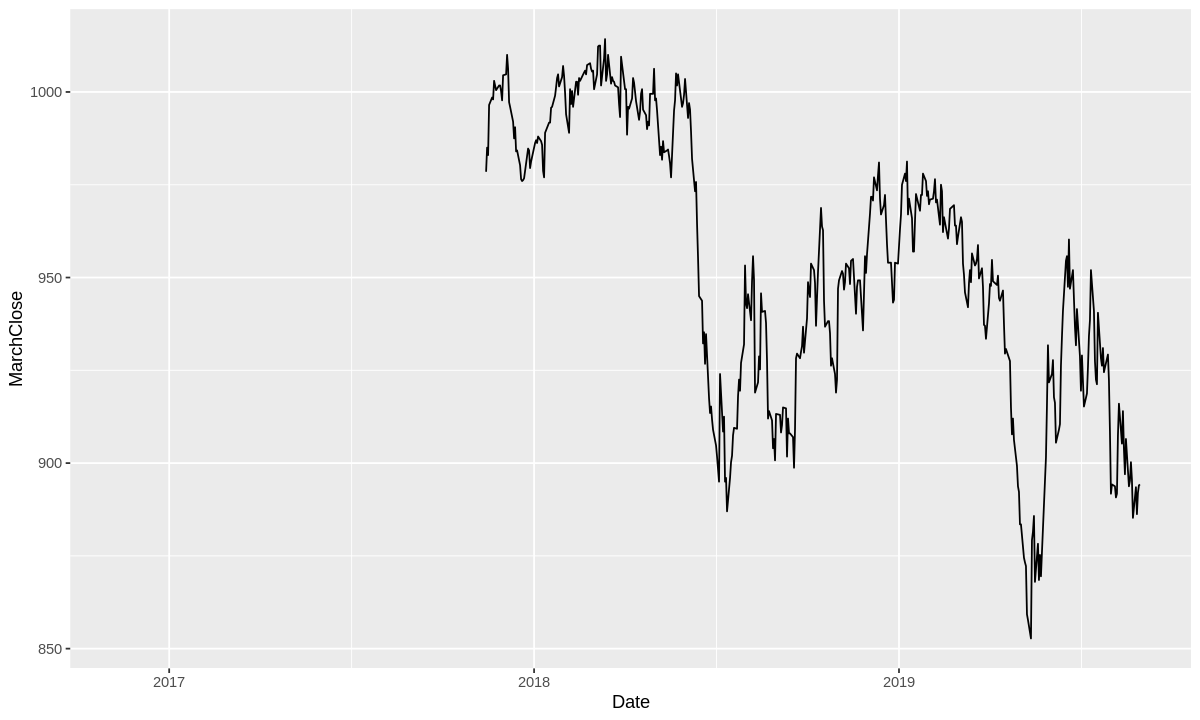

In [6]:
ggplot(contracts) +
    geom_line(aes(x=Date, y=MarchClose))

Warning message:
“Removed 252 rows containing missing values (geom_path).”

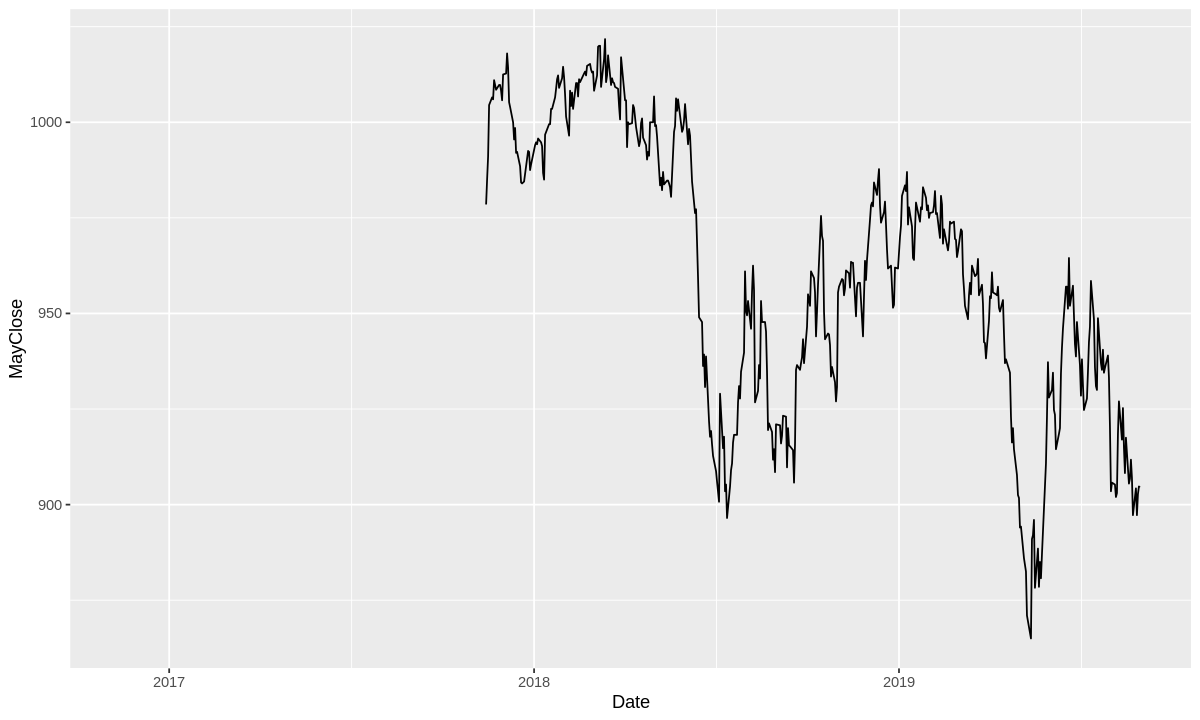

In [7]:
ggplot(contracts) +
    geom_line(aes(Date, MayClose))

Warning message:
“Removed 252 rows containing missing values (geom_point).”

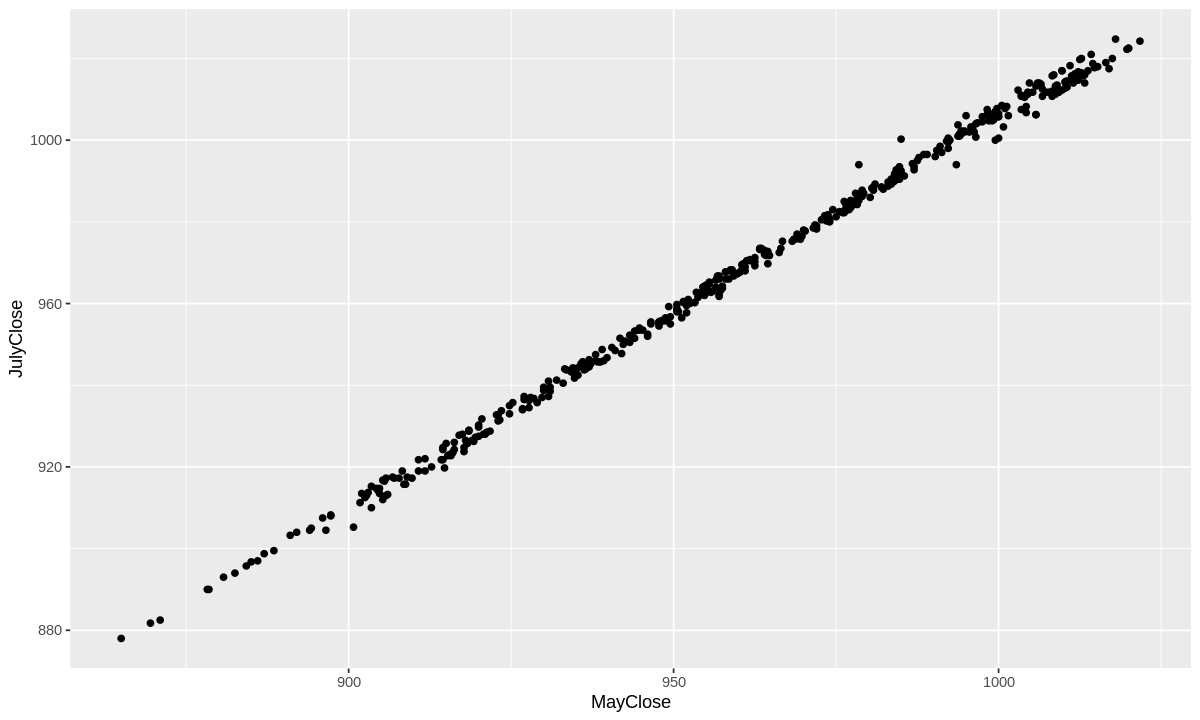

In [8]:
ggplot(contracts) +
    geom_point(aes(MayClose, JulyClose))

Warning message:
“Removed 252 rows containing missing values (geom_point).”

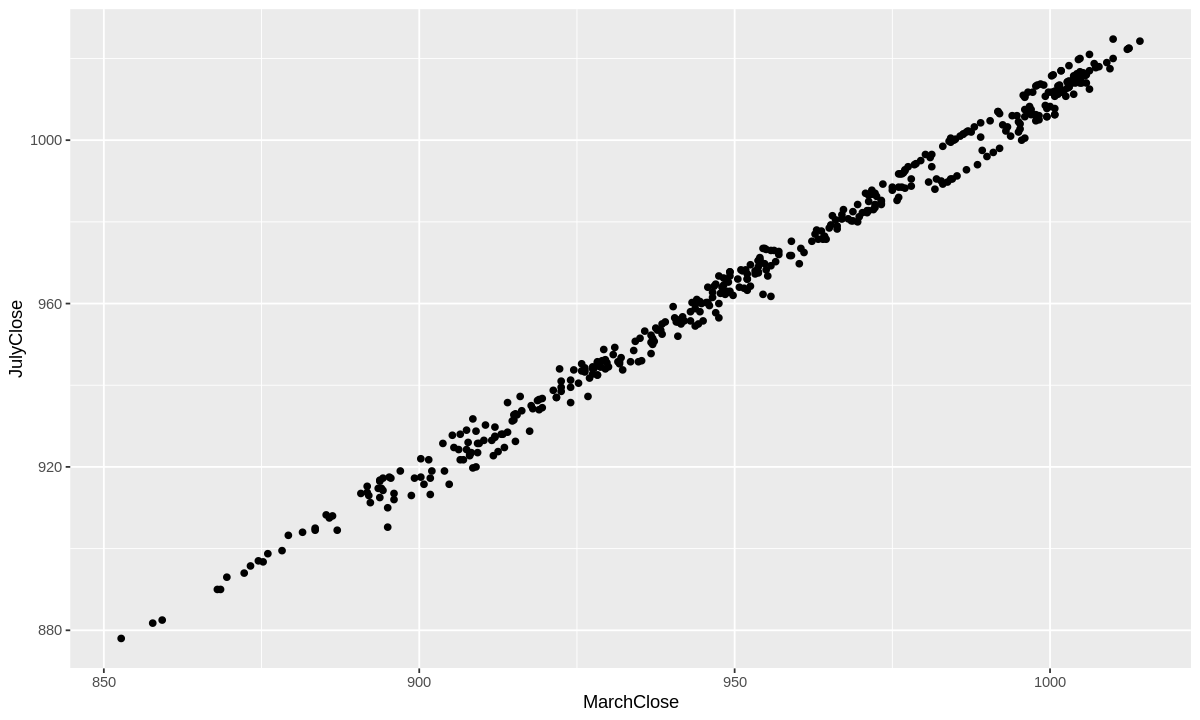

In [9]:
ggplot(contracts) +
    geom_point(aes(MarchClose, JulyClose))

Warning message:
“Removed 252 rows containing missing values (geom_point).”

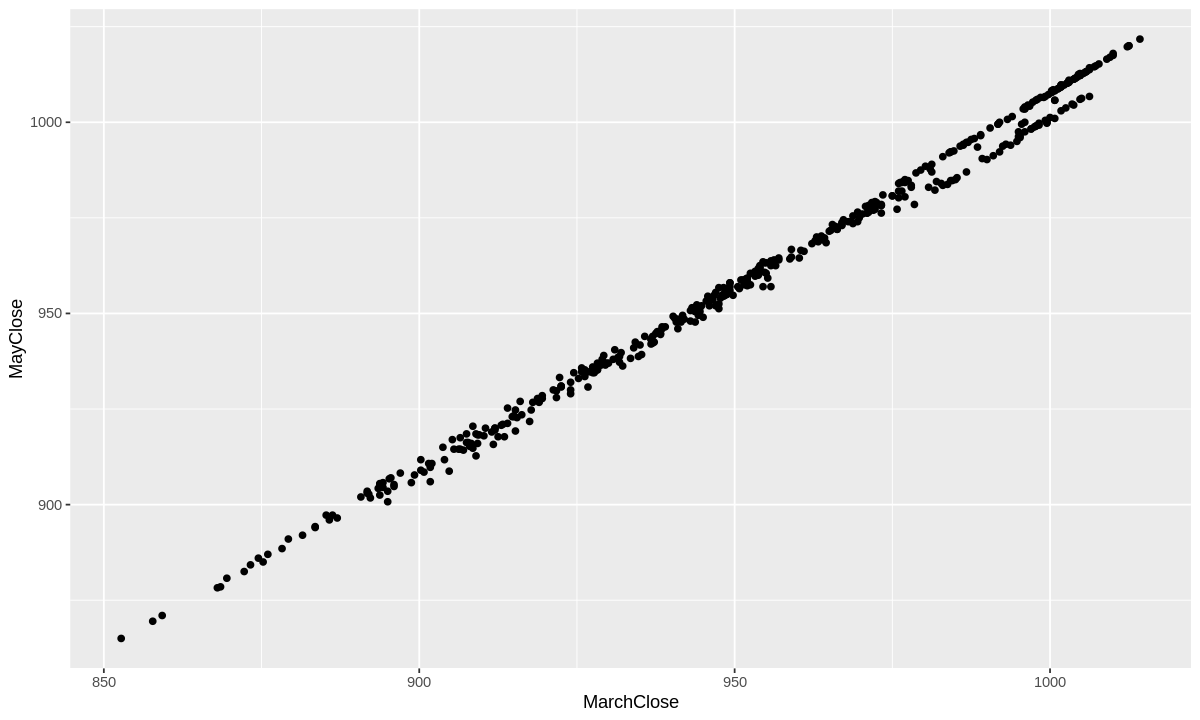

In [10]:
ggplot(contracts) +
    geom_point(aes(MarchClose, MayClose))

In [11]:
summary(lm(JulyClose~MarchClose, data=contracts))


Call:
lm(formula = JulyClose ~ MarchClose, data = contracts)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5142 -1.6128  0.1243  2.1471  5.5249 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.656051   3.374807   25.97   <2e-16 ***
MarchClose   0.923026   0.003538  260.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.817 on 450 degrees of freedom
  (252 observations deleted due to missingness)
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9934 
F-statistic: 6.808e+04 on 1 and 450 DF,  p-value: < 2.2e-16


In [12]:
summary(lm(JulyClose~MayClose, data=contracts))


Call:
lm(formula = JulyClose ~ MayClose, data = contracts)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6083 -0.9813  0.1382  1.2288  8.7879 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 47.451262   2.173065   21.84   <2e-16 ***
MayClose     0.958387   0.002262  423.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.738 on 450 degrees of freedom
  (252 observations deleted due to missingness)
Multiple R-squared:  0.9975,	Adjusted R-squared:  0.9975 
F-statistic: 1.795e+05 on 1 and 450 DF,  p-value: < 2.2e-16


In [13]:
summary(lm(MayClose~MarchClose, data=contracts))


Call:
lm(formula = MayClose ~ MarchClose, data = contracts)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8509 -0.9278  0.1480  2.0089  3.5752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.82965    2.68038   15.61   <2e-16 ***
MarchClose   0.96323    0.00281  342.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.237 on 450 degrees of freedom
  (252 observations deleted due to missingness)
Multiple R-squared:  0.9962,	Adjusted R-squared:  0.9962 
F-statistic: 1.175e+05 on 1 and 450 DF,  p-value: < 2.2e-16


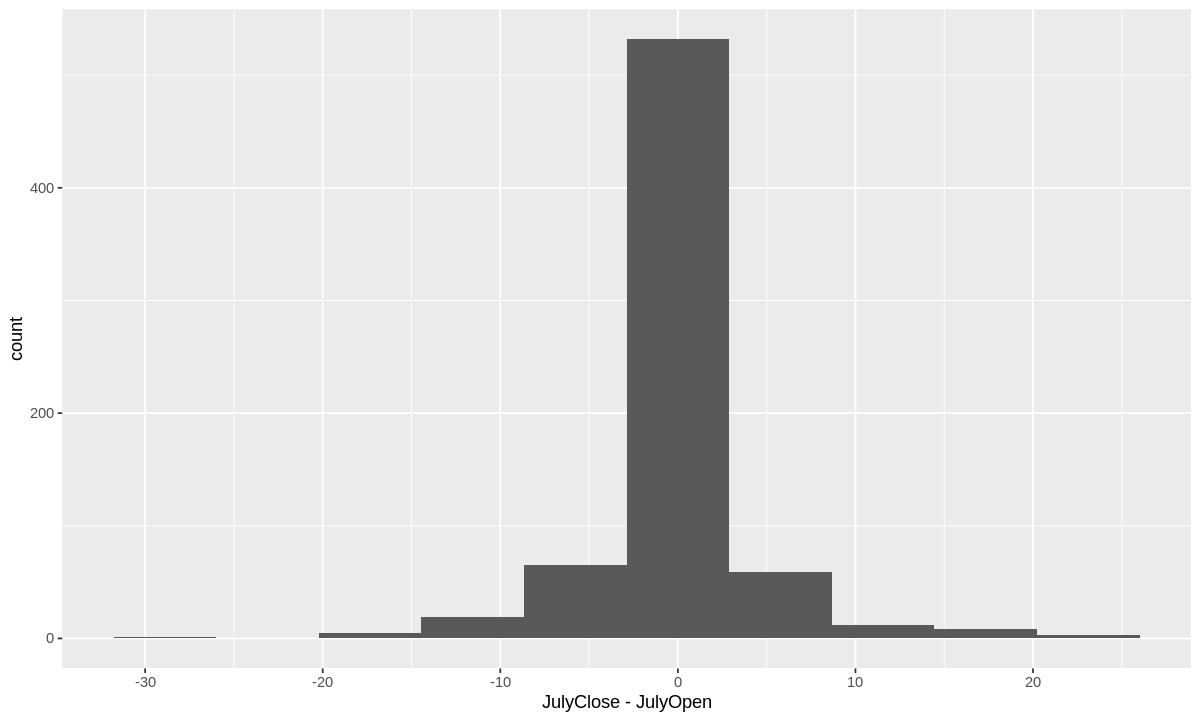

In [14]:
ggplot(contracts) +
    geom_histogram(aes(JulyClose - JulyOpen), bins=10)

In [15]:
sum(contracts$JulyClose == contracts$JulyOpen) / nrow(contracts)

[1] 0.6221591

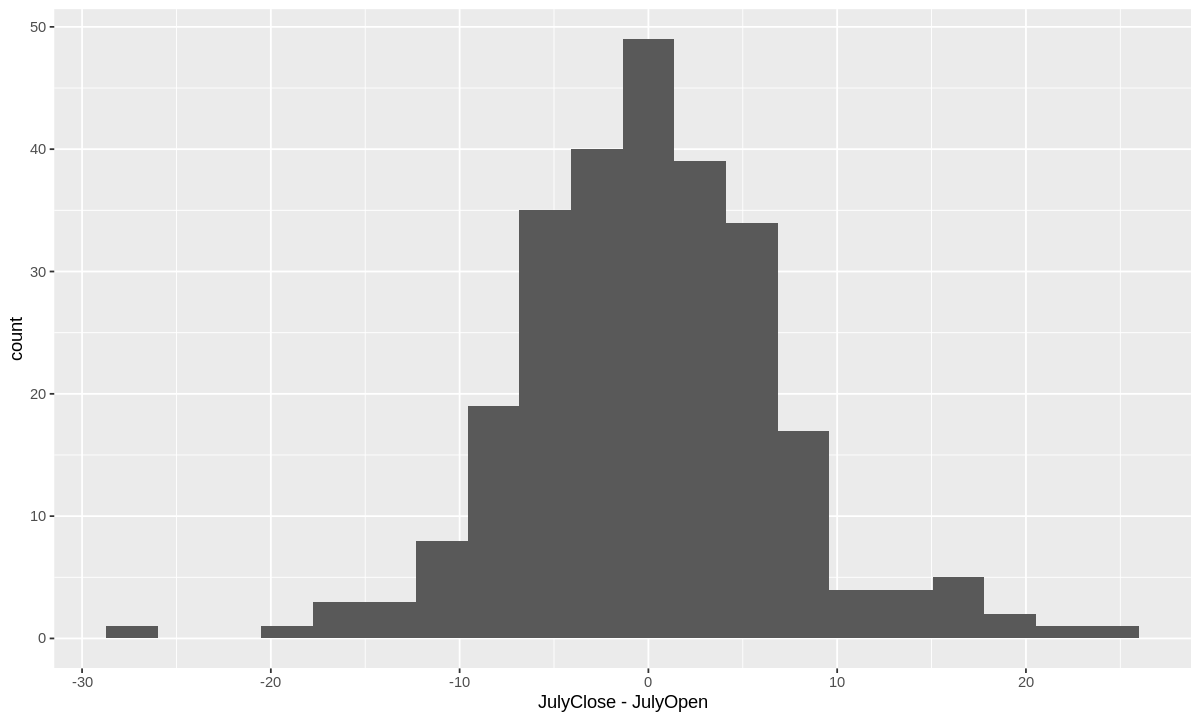

In [16]:
contracts %>% 
    filter(JulyClose != JulyOpen) %>% 
ggplot() +
    geom_histogram(aes(JulyClose - JulyOpen), bins=20)

In [17]:
contracts %>% 
    mutate(Month = str_sub(Date, end=7)) %>% 
    group_by(Month) %>% 
    summarise(sum(JulyOpen == JulyClose) / n())

Month,sum(JulyOpen == JulyClose)/n()
<chr>,<dbl>
2016-11,1.00000000
2016-12,1.00000000
2017-01,1.00000000
2017-02,1.00000000
2017-03,0.95652174
2017-04,1.00000000
2017-05,1.00000000
2017-06,1.00000000
2017-07,1.00000000


In [18]:
contracts %>% 
    mutate(Month = str_sub(Date, end=7)) %>% 
    filter(!is.na(MarchClose)) %>% 
    group_by(Month) %>% 
    summarise(sum(MarchOpen == MayClose) / n())

Month,sum(MarchOpen == MayClose)/n()
<chr>,<dbl>
2017-11,0.16666667
2017-12,0.00000000
2018-01,0.00000000
2018-02,0.00000000
2018-03,0.00000000
2018-04,0.00000000
2018-05,0.00000000
2018-06,0.00000000
2018-07,0.00000000


In [19]:
contracts %>% 
    mutate(Month = str_sub(Date, end=7)) %>% 
    filter(!is.na(MayClose)) %>% 
    group_by(Month) %>% 
    summarise(sum(MarchOpen == MarchClose) / n())

Month,sum(MarchOpen == MarchClose)/n()
<chr>,<dbl>
2017-11,1.00000000
2017-12,1.00000000
2018-01,1.00000000
2018-02,0.94736842
2018-03,0.95238095
2018-04,1.00000000
2018-05,0.86363636
2018-06,0.90476190
2018-07,0.52380952


In [20]:
combinedData <- usSoyBeanIndices %>% 
    select(
        Date,
        IndexOpen = Open,
        IndexHigh = High,
        IndexLow = Low,
        IndexClose = Price
    ) %>% 
    inner_join(contracts, 'Date')

In [21]:
head(combinedData)

Date,IndexOpen,IndexHigh,IndexLow,IndexClose,MarchOpen,MarchHigh,MarchLow,MarchClose,MayOpen,MayHigh,MayLow,MayClose,JulyOpen,JulyHigh,JulyLow,JulyClose
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-08-30,868.38,877.62,867.12,868.25,893.50,903.25,892.25,894.25,904.00,913.25,903.00,904.50,914.75,923.25,913.00,914.25
2019-08-29,865.62,872.88,865.12,868.25,891.50,897.50,891.50,894.00,902.75,907.75,902.50,904.75,913.00,918.00,912.75,914.75
2019-08-28,859.38,867.62,852.62,865.25,886.25,894.00,879.50,892.00,897.25,904.75,890.75,902.75,908.50,915.00,901.25,913.00
2019-08-27,865.62,865.88,856.12,859.00,891.50,892.00,883.25,886.25,903.00,903.00,894.75,897.25,913.00,913.50,906.00,908.00
2019-08-26,855.88,870.38,855.88,865.50,883.50,897.75,883.50,893.50,895.75,909.00,895.75,904.25,908.25,919.75,907.50,914.75
2019-08-23,868.38,872.00,855.12,855.12,895.50,898.75,883.50,885.25,907.25,910.00,895.50,897.25,917.50,920.25,906.50,908.25


In [23]:
summary(lm(IndexClose~MayClose, data=combinedData))

Warning message in storage.mode(v) <- "double":
“NAs introduced by coercion”

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


Warning message:
“Removed 219 rows containing missing values (geom_point).”

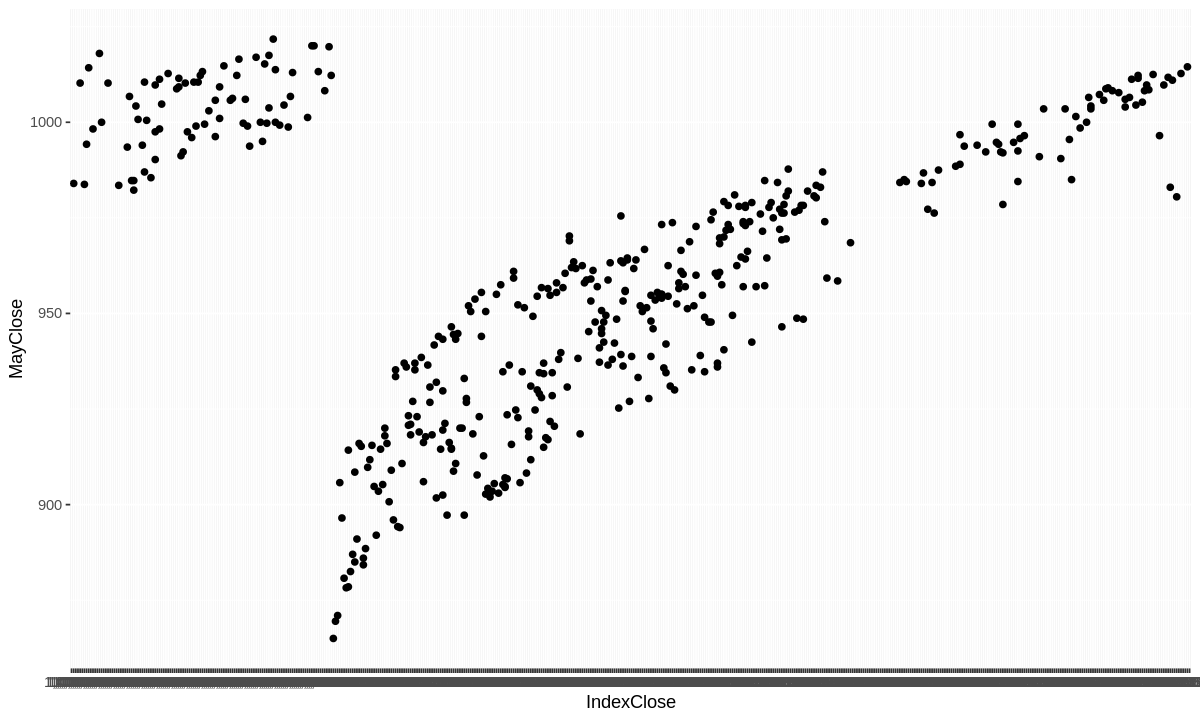

In [24]:
ggplot(combinedData) +
    geom_point(aes(IndexClose, MayClose))

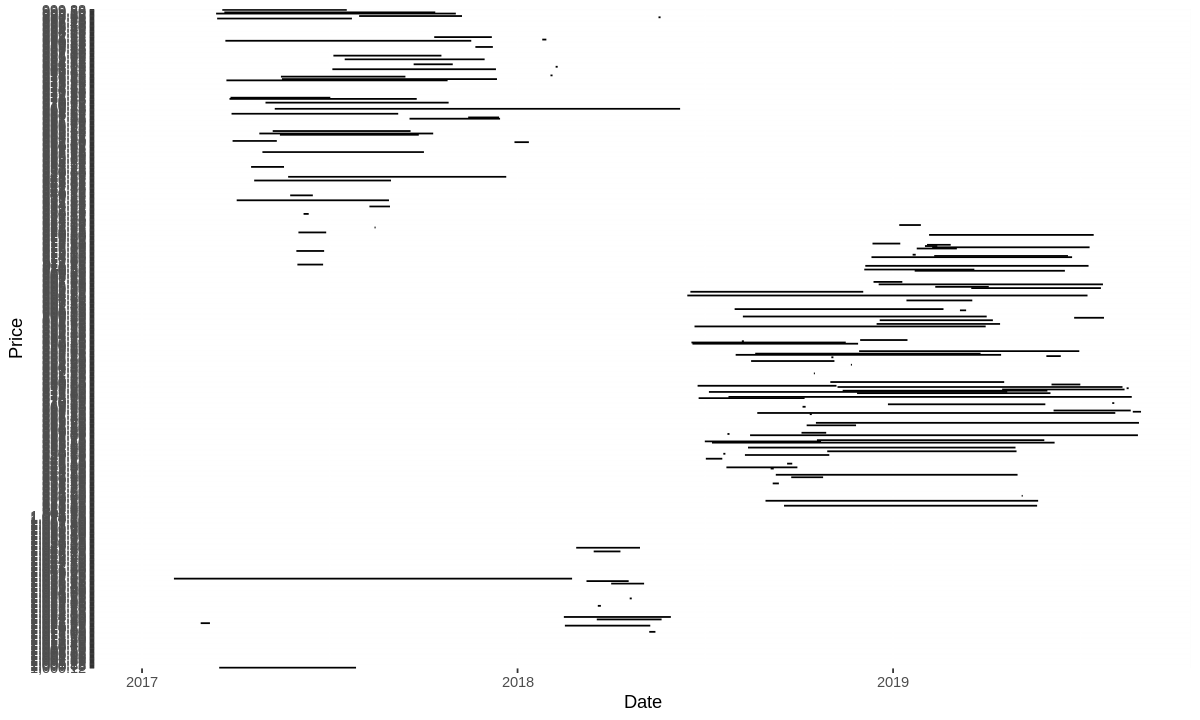

In [25]:
ggplot(usSoyBeanIndices) +
    geom_line(aes(Date, Price))

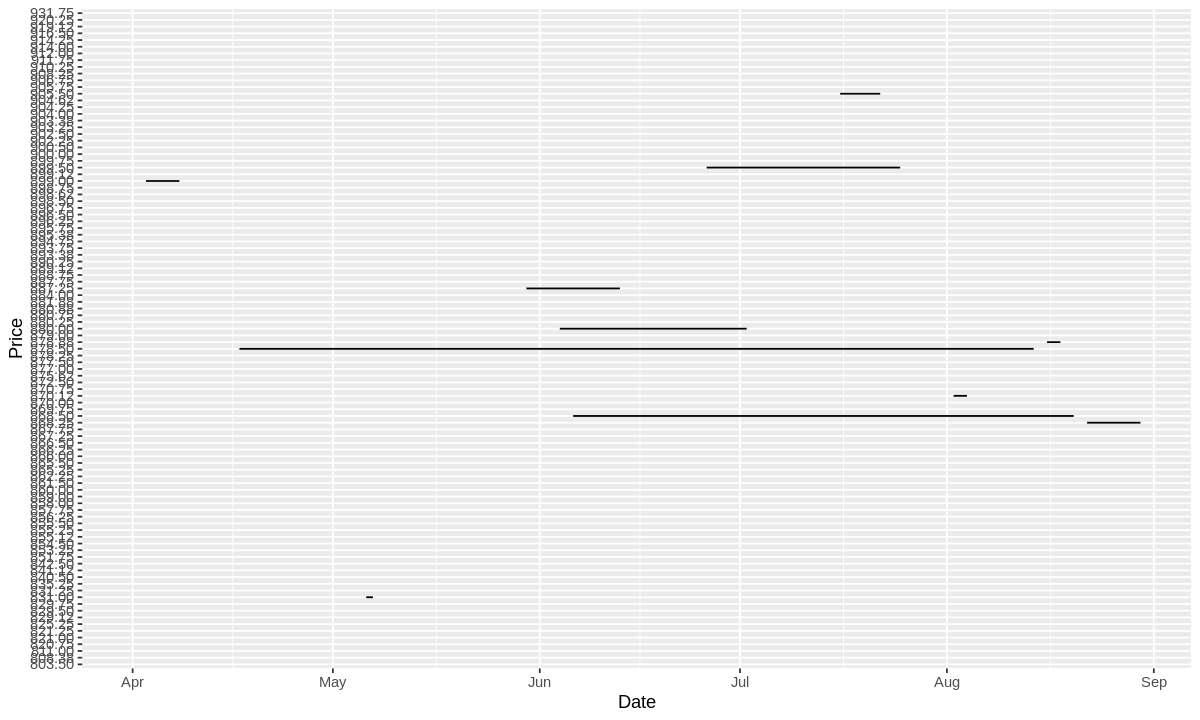

In [26]:
usSoyBeanIndices %>%
    filter(Date >= '2019-04-01') %>% 
    arrange(Date) %>% 
ggplot() +
    geom_line(aes(Date, Price))

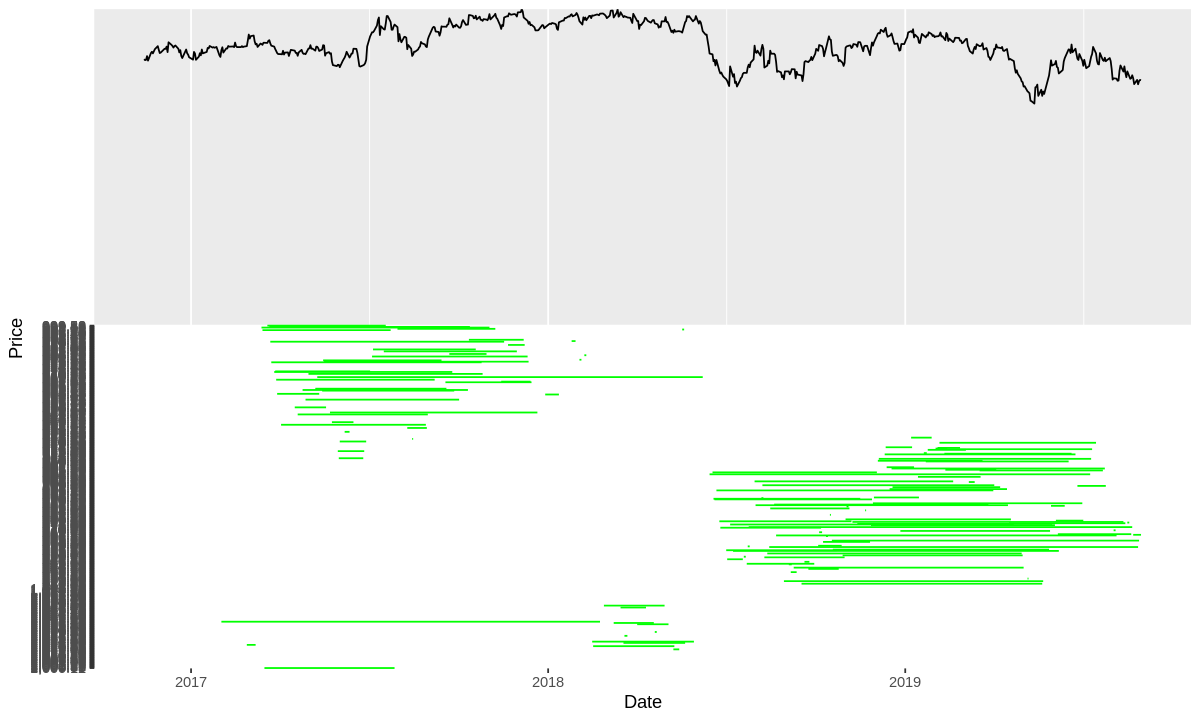

In [27]:
ggplot(usSoyBeanIndices) +
    geom_line(aes(Date, Price), color='green') +
    geom_line(aes(Date, JulyClose), data=contracts)

In [28]:
str(usSoyBeanIndices)

'data.frame':	704 obs. of  7 variables:
 $ Date    : Date, format: "2019-08-30" "2019-08-29" ...
 $ Price   : chr  "868.25" "868.25" "865.25" "859.00" ...
 $ Open    : chr  "868.38" "865.62" "859.38" "865.62" ...
 $ High    : chr  "877.62" "872.88" "867.62" "865.88" ...
 $ Low     : chr  "867.12" "865.12" "852.62" "856.12" ...
 $ Vol.    : chr  "-" "-" "-" "-" ...
 $ Change..: chr  "0.00%" "0.35%" "0.73%" "-0.75%" ...


In [29]:
head(contracts)

Date,MarchOpen,MarchHigh,MarchLow,MarchClose,MayOpen,MayHigh,MayLow,MayClose,JulyOpen,JulyHigh,JulyLow,JulyClose
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-11-14,NA,NA,NA,NA,NA,NA,NA,NA,947.00,947.00,947.00,947.00
2016-11-15,NA,NA,NA,NA,NA,NA,NA,NA,945.50,945.50,945.50,945.50
2016-11-16,NA,NA,NA,NA,NA,NA,NA,NA,946.00,946.00,946.00,946.00
2016-11-17,NA,NA,NA,NA,NA,NA,NA,NA,951.75,951.75,951.75,951.75
2016-11-18,NA,NA,NA,NA,NA,NA,NA,NA,944.75,944.75,944.75,944.75
2016-11-21,NA,NA,NA,NA,NA,NA,NA,NA,956.50,956.50,956.50,956.50
